# Raw Data vs PCA

**Index**:
- [Ensembles](#Ensembles)
    - [Preprocessing](#preprocessing-of-the-ensemble-results)
    - [Analysis of the results](#Analysis-of-the-ensemble-results)
        - [General plots](#General-plots-for-the-ensemble-results)
        - [Plots per class](#Plots-for-the-ensemble-results-per-class)
        - [General table](#General-table-for-the-ensemble-results)
        - [Table per class](#Tables-per-class-for-the-ensemble-results)

In [43]:
using Serialization
using DataStructures

In [44]:
include("plotting.jl")

generateComparisonTable (generic function with 2 methods)

## Preprocessing of the ensemble results

Load the results of first approach:

In [45]:
results_folder = "results/"
filename_1 = results_folder * "2_ensemble_results.jl"

# Load the results
approach1_obj = open(filename_1, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.936199, 0.830846, 0.7…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.887233, 0.755634, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.870399, 0.769014, 0.7…

The same for the second approach:

In [46]:
filename_2 = results_folder * "3_ensemble_results.jl"

# Load the results
approach2_obj = open(filename_2, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.893665, 0.714789, 0.6…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.915837, 0.749296, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.90724, 0.809859, 0.81…

Now, let's put in the same object the results of both approaches:

In [47]:
loaded_obj = OrderedDict(
    :Voting_Soft_PCA => approach1_obj[:Voting_Soft],
    :Voting_Soft_Balancing => approach2_obj[:Voting_Soft],
    :Voting_Hard_PCA => approach1_obj[:Voting_Hard],
    :Voting_Hard_Balancing => approach2_obj[:Voting_Hard],
    :Stacking_PCA => approach1_obj[:Stacking],
    :Stacking_Balancing => approach2_obj[:Stacking],
)

OrderedDict{Symbol, Dict{String, Any}} with 6 entries:
  :Voting_Soft_PCA       => Dict("class_results"=>[Dict(:recall=>[0.887233, 0.7…
  :Voting_Soft_Balancing => Dict("class_results"=>[Dict(:recall=>[0.915837, 0.7…
  :Voting_Hard_PCA       => Dict("class_results"=>[Dict(:recall=>[0.936199, 0.8…
  :Voting_Hard_Balancing => Dict("class_results"=>[Dict(:recall=>[0.893665, 0.7…
  :Stacking_PCA          => Dict("class_results"=>[Dict(:recall=>[0.870399, 0.7…
  :Stacking_Balancing    => Dict("class_results"=>[Dict(:recall=>[0.90724, 0.80…

In [48]:
model_names, metrics, metric_means, metric_stds, metric_means_class, metric_stds_class, metric_maxes, metric_maxes_class = aggregateMetrics(loaded_obj, 3, ensemble=true)
plots_output_dir = "./plots/Comparison_2_3/"
tables_output_dir = "./tables/Comparison_2_3/"

"./tables/Comparison_2_3/"

## Analysis of the ensemble results

### General plots for the ensemble results

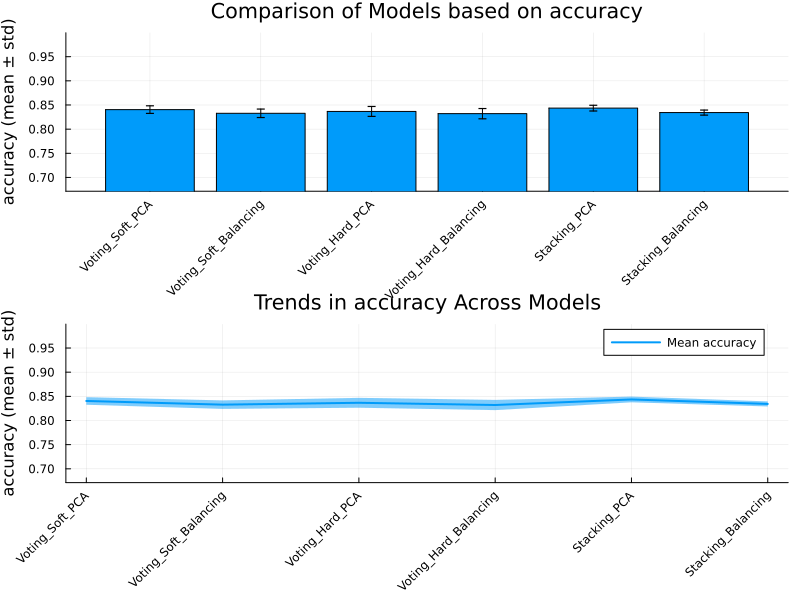

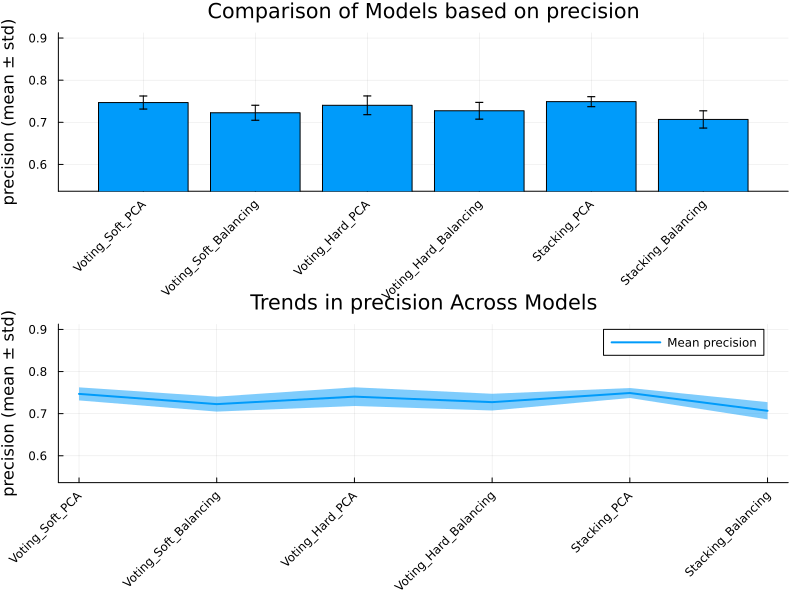

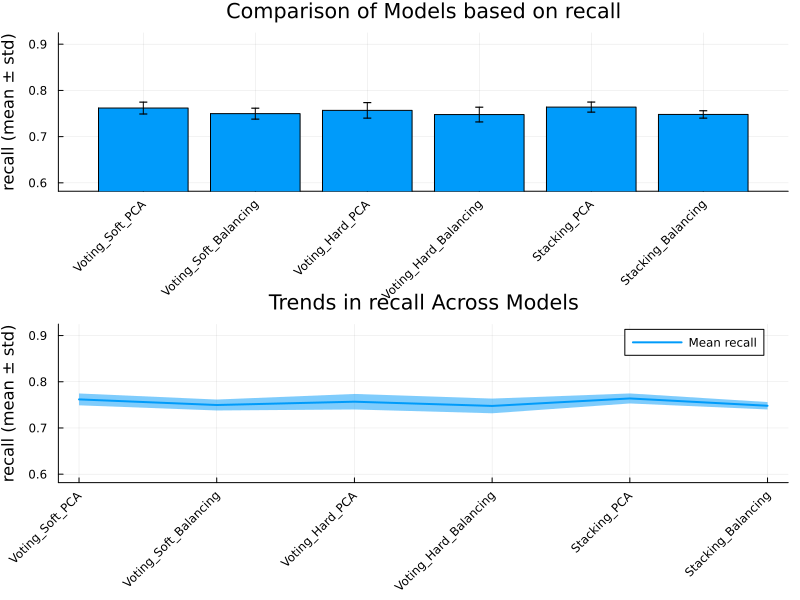

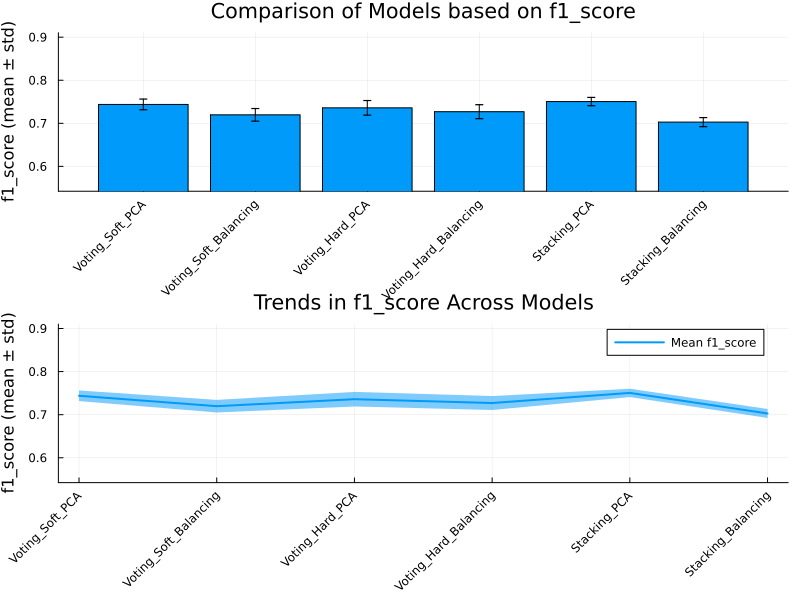

In [49]:
plotCombinedMetrics(model_names, metrics, metric_means, metric_stds, output_dir=plots_output_dir*"ensembles", show=true, rotate_xticks=true)

### Plots per class for the ensemble results

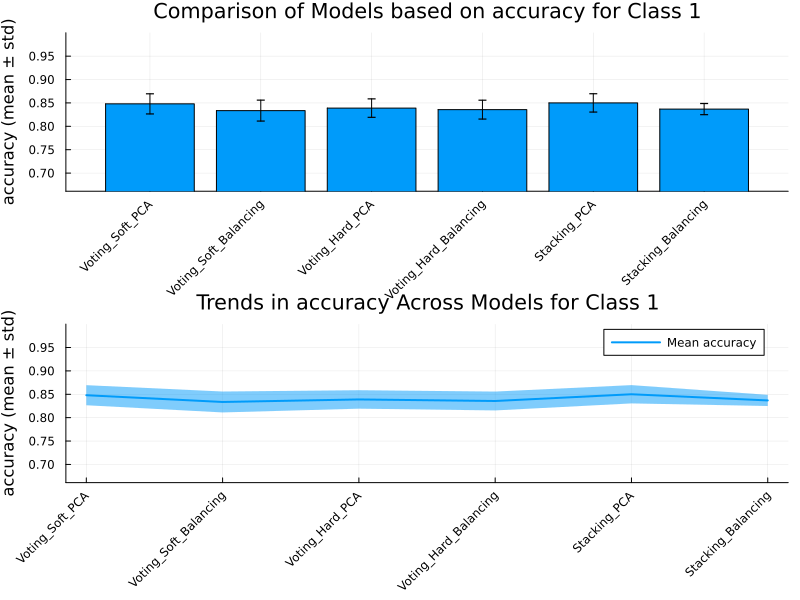

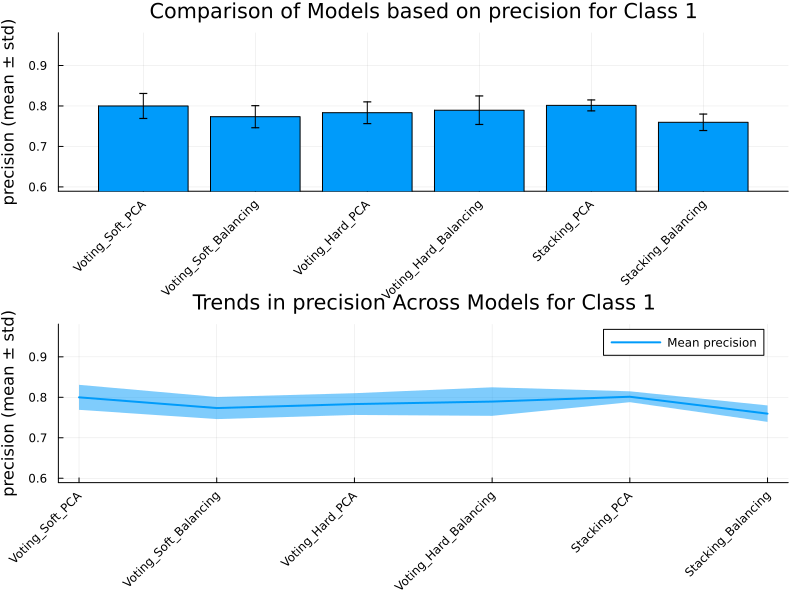

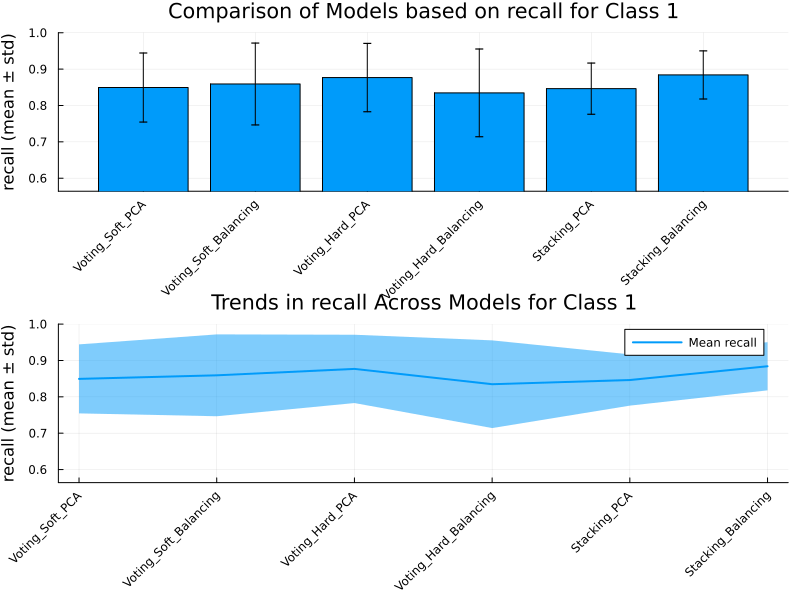

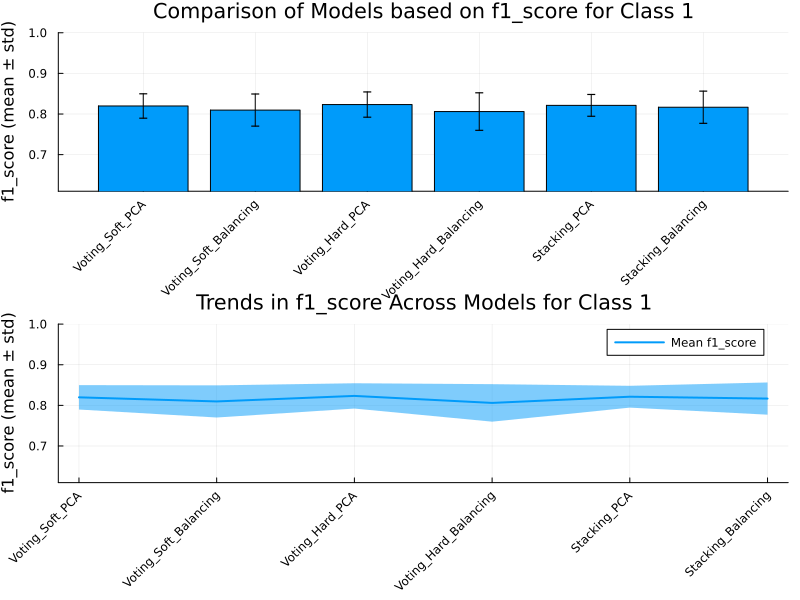

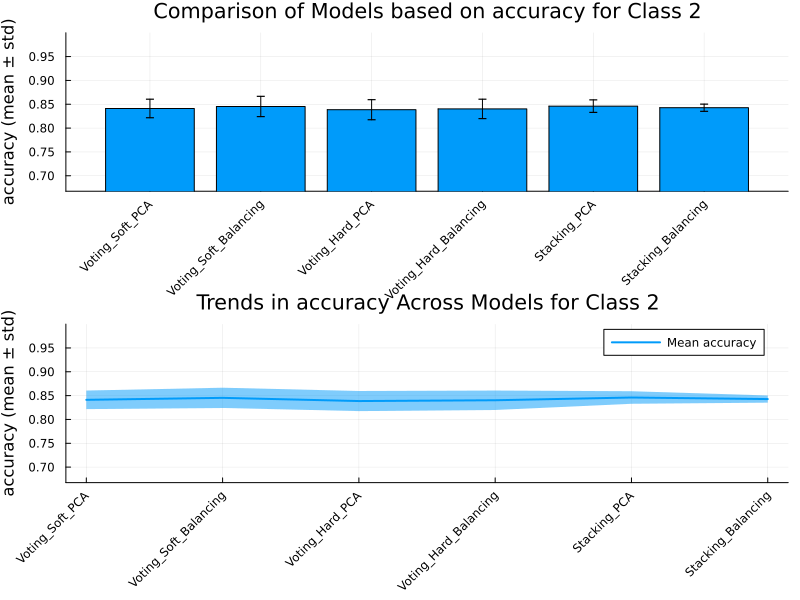

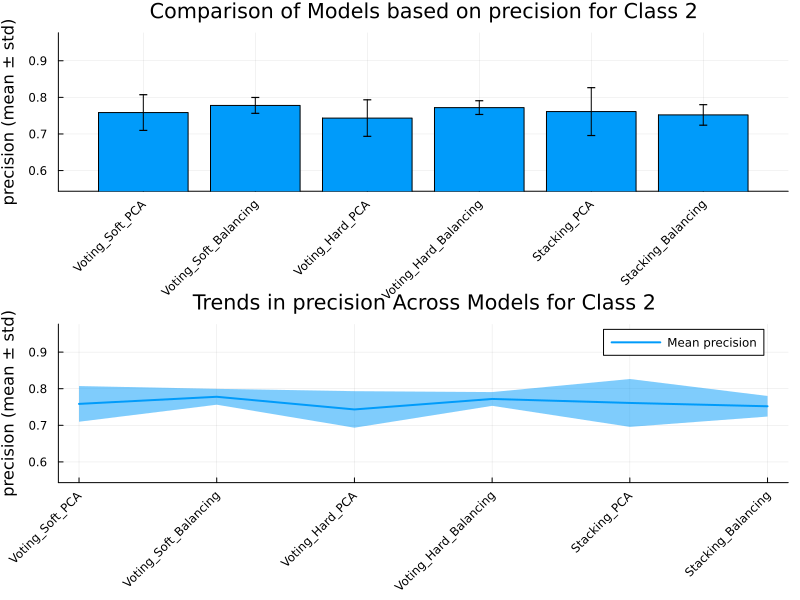

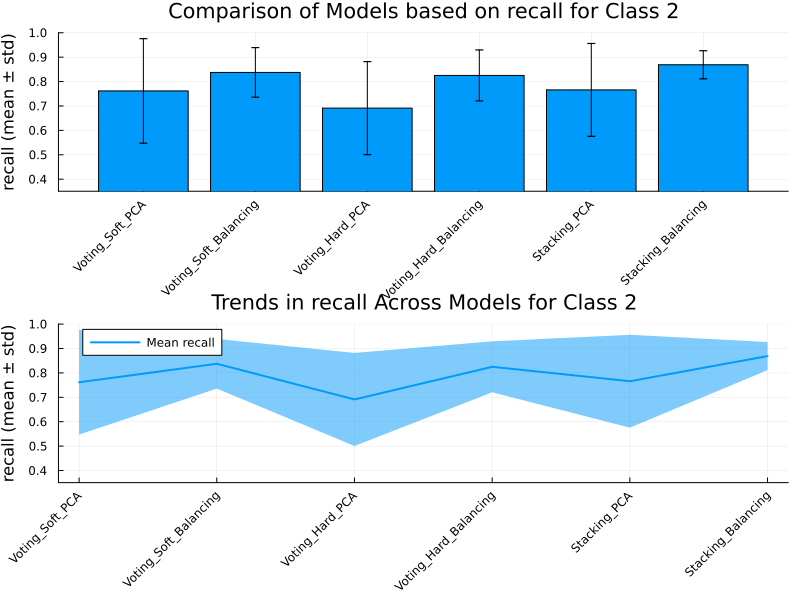

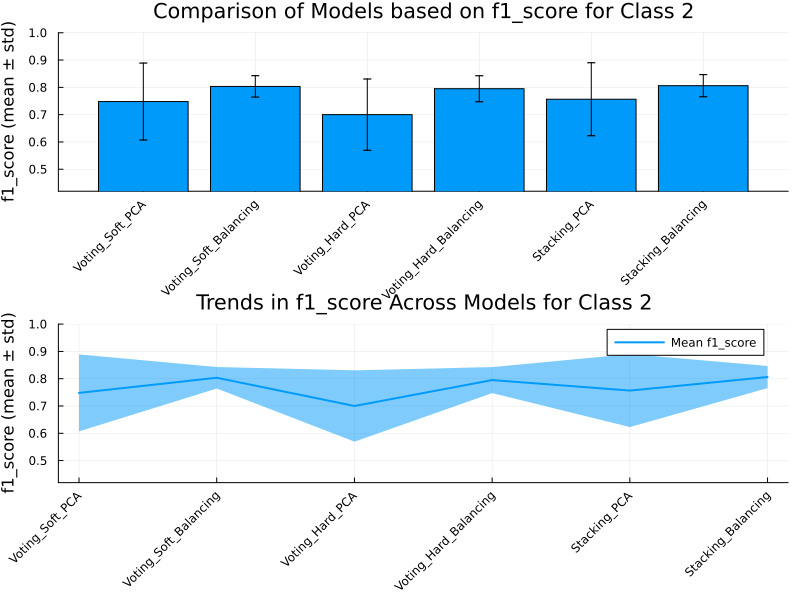

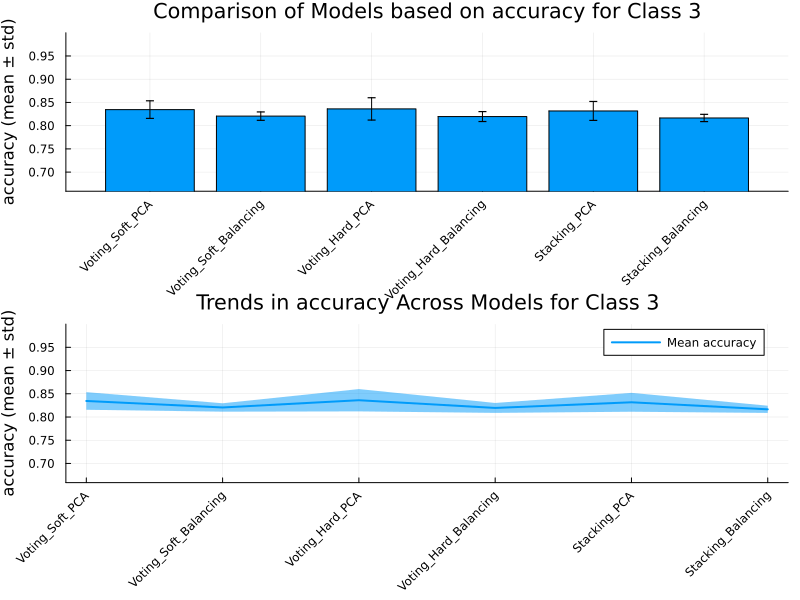

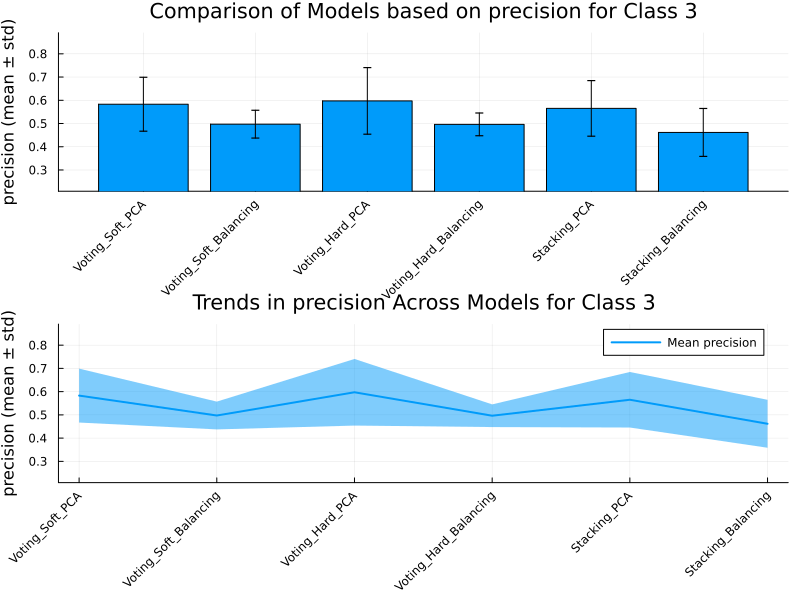

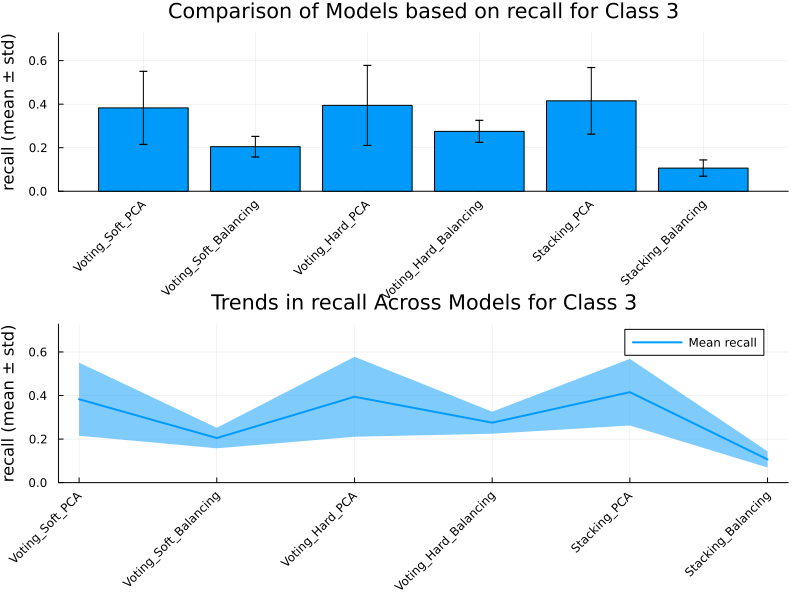

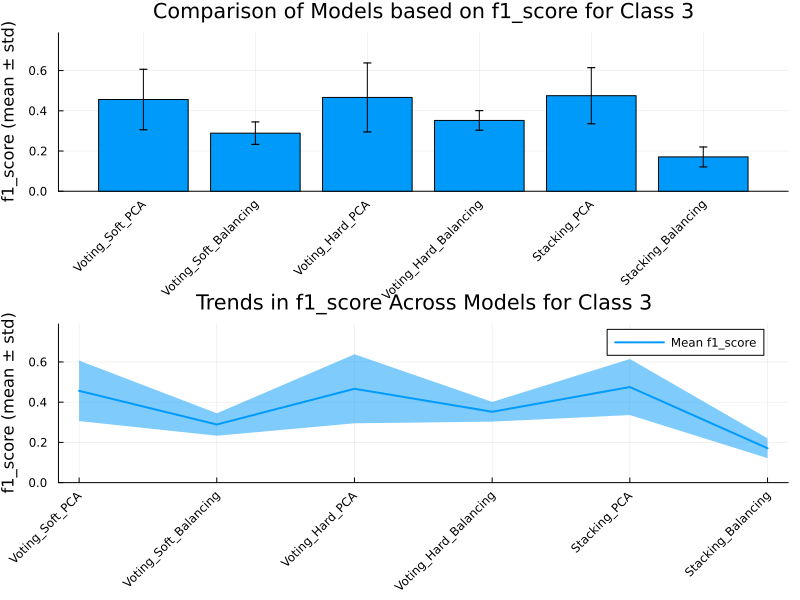

In [50]:
plotCombinedMetrics(model_names, 3, metrics, metric_means_class, metric_stds_class, output_dir=plots_output_dir*"ensembles/class", show=true, rotate_xticks=true)

### General table for the ensemble results

In [51]:
generateComparisonTable(model_names, metrics, metric_maxes; output_dir=tables_output_dir*"ensembles", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼──────────┼───────────┼────────┼──────────┤
│          Stacking_PCA │     0.85 │     0.763 │  0.776 │    0.762 │
│       Voting_Soft_PCA │    0.849 │     0.766 │  0.776 │    0.758 │
│       Voting_Hard_PCA │     0.85 │     0.771 │  0.779 │    0.758 │
│ Voting_Hard_Balancing │    0.848 │      0.76 │  0.771 │    0.754 │
│ Voting_Soft_Balancing │    0.847 │      0.75 │  0.769 │    0.745 │
│    Stacking_Balancing │    0.838 │     0.732 │  0.755 │    0.719 │
└───────────────────────┴──────────┴───────────┴────────┴──────────┘


### Tables per class for the ensemble results

In [52]:
generateComparisonTable(model_names, 3, metrics, metric_maxes_class; output_dir =tables_output_dir*"ensembles/class", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models for Class 1 (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼──────────┼───────────┼────────┼──────────┤
│       Voting_Soft_PCA │    0.872 │     0.837 │  0.948 │    0.853 │
│       Voting_Hard_PCA │    0.863 │     0.822 │  0.958 │    0.853 │
│          Stacking_PCA │    0.871 │     0.816 │  0.925 │    0.852 │
│    Stacking_Balancing │    0.853 │     0.775 │  0.945 │     0.85 │
│ Voting_Soft_Balancing │    0.864 │     0.812 │  0.955 │    0.845 │
│ Voting_Hard_Balancing │    0.868 │     0.849 │  0.939 │    0.842 │
└───────────────────────┴──────────┴───────────┴────────┴──────────┘

Comparison of Metrics Across Models for Class 2 (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼─────